<a href="https://colab.research.google.com/github/alexcpass/tictactoe2/blob/master/diamonds_project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Preços outliers de diamante

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib

diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
diamonds['cut'].count()

53940

Verificando os outliers

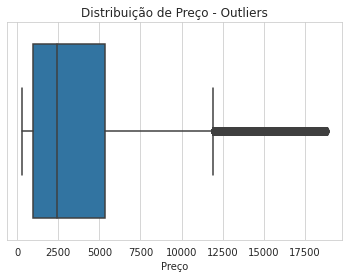

In [3]:
with sns.axes_style('whitegrid'):
  grafico = sns.boxplot(x=diamonds["price"])
  grafico.set(title='Distribuição de Preço - Outliers', xlabel='Preço');

Preços maiores do que 12000

In [4]:
diamonds_out = diamonds.groupby(by='price').agg('sum').query('price > 11999').reset_index('price')
diamonds_out.tail(3)

,price,carat,depth,table,x,y,z
2460,18806,1.51,61.7,55.0,7.37,7.41,4.56
2461,18818,2.00,63.5,56.0,7.90,7.97,5.04
2462,18823,2.29,60.8,60.0,8.50,8.47,5.16


In [5]:
diamonds_out.head(3)
diamonds_out.count()

price    2463
carat    2463
depth    2463
table    2463
x        2463
y        2463
z        2463
dtype: int64

Os dados abaixo encontram-se fora da curva, fora da normalidade, mas mostram qtde consideravel de diamantes que ultrapassam o preço de $12.000 (mais de 2400 casos). Em alguns casos, pode significar exatamente o que se procura e por se tratar de informação sobre diamantes, essa qtde representa um valor maior, talvez influenciando positivamente na receita.

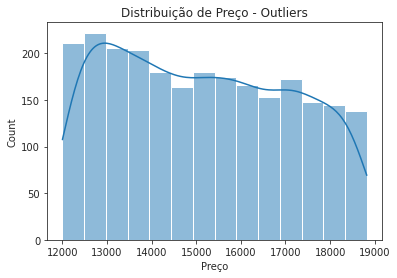

In [6]:
with sns.axes_style('ticks'):
  grafico = sns.histplot(x=diamonds_out["price"],kde=True)
  grafico.set(title='Distribuição de Preço - Outliers', xlabel='Preço');

2. Correlação entre o preço do diamante + peso ( carat ) agrupados por sua transparêcia
( clarity )

Temos aqui uma correlação quilates(peso) x preço (com base na transparencia)

*   Na medida em que o nivel de peso ultrapassa 2.5, os outliers aparecem;
*   Há uma maior concentração de valores (preço) entre 10k e 20k.



[Text(0.5, 1.0, 'Analise Peso x Preço')]

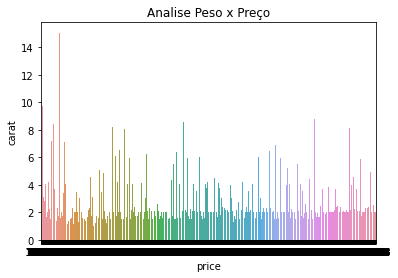

In [13]:
sns.barplot(diamonds_out, x='price', y='carat').set(title='Analise Peso x Preço')

Text(0.5, 1.0, 'Peso Vs Preço (Baseado em transparencia)')

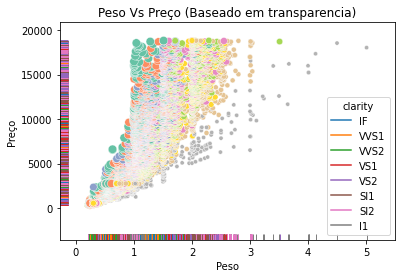

In [17]:
sns.scatterplot(x='carat', y='price',hue='clarity', size='clarity', data=diamonds, palette='Set2')
sns.rugplot(x='carat', y='price', hue='clarity', data=diamonds)

plt.xlabel('Peso')
plt.ylabel('Preço')
plt.title('Peso Vs Preço (Baseado em transparencia)')

3. Distribuição contínua aproximada do peso
( weight ) de carros

In [8]:
import seaborn as sns
data = sns.load_dataset("mpg")
data.tail(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [9]:
carros = data[['name','weight']].groupby('name').agg('sum').reset_index('name').sort_values(by=['weight'], ascending=True)
carros.tail(3)

,name,weight
156,ford pinto,14995
54,chevrolet impala,17834
10,amc matador,18284


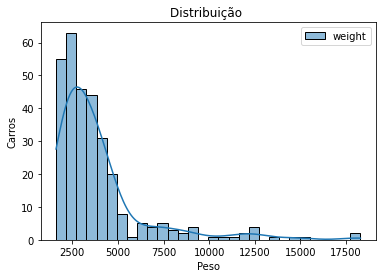

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.histplot(carros, kde=True)
plt.xlabel('Peso')
plt.ylabel('Carros')
plt.title('Distribuição ')
plt.show()


Existe uma nitida concentração na distribuição de veiculos, do mais leve (em maior quantidade) até os mais pesados (em quantidades menores)